In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import *

In [6]:
#df_test = pd.read_csv("../input/how-much-did-it-rain-ii/test.zip")
df = pd.read_csv("../input/how-much-did-it-rain-ii/train.zip")

In [7]:
def process_data(df):
    df_mean = df.groupby('Id').mean()
    df_mean.fillna(0,inplace=True)
    df_mean.reset_index(inplace=True)
    return df_mean

In [8]:
df_mean = process_data(df)

In [9]:
df_mean['Expected'].describe()

count    1.180945e+06
mean     1.322453e+02
std      6.030804e+02
min      1.000000e-02
25%      2.540001e-01
50%      1.016001e+00
75%      3.810002e+00
max      3.301773e+04
Name: Expected, dtype: float64

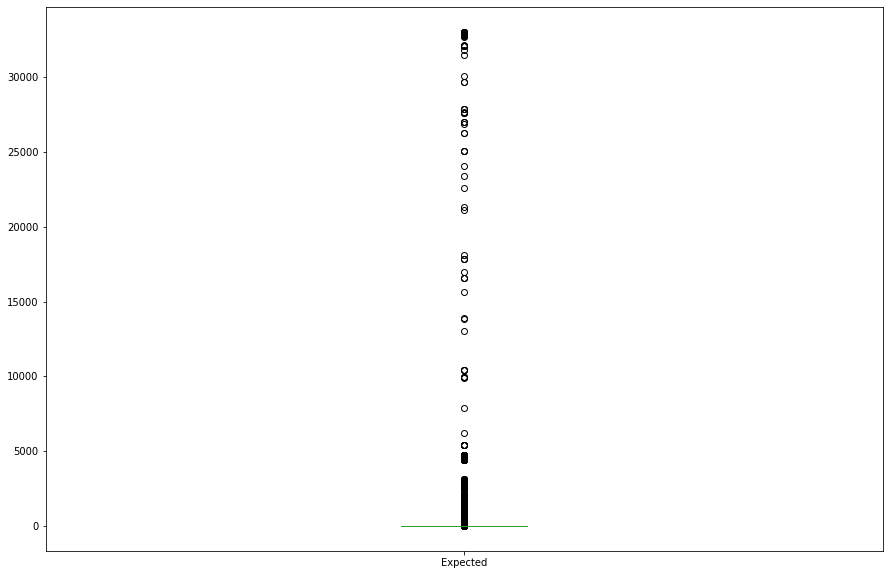

In [10]:
plt.figure(figsize=(15,10))
df_mean['Expected'].plot(kind='box')
plt.show()

In [11]:
df_sample = df_mean.sample(n=100000)

In [12]:
df_sample['Expected']

589179     2020.825100
336521        1.778001
1142465       0.508000
688216        0.508000
294232        5.334003
              ...     
369153      193.802100
496830        1.016001
471928        5.080003
702922       20.574010
171430        0.254000
Name: Expected, Length: 100000, dtype: float64

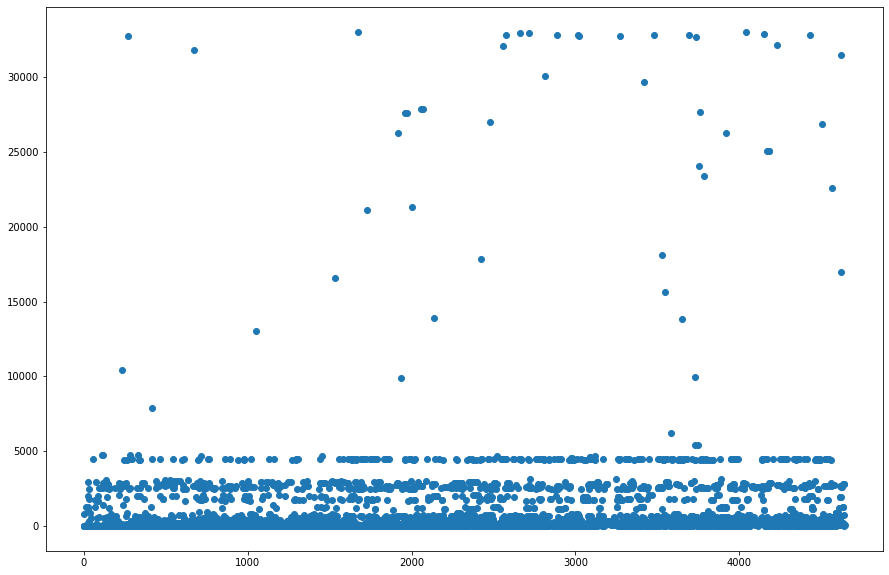

In [13]:
plt.figure(figsize=(15,10))
plt.scatter([x for x in range(len(df_mean['Expected'].unique()))], df_mean['Expected'].unique())
plt.show()

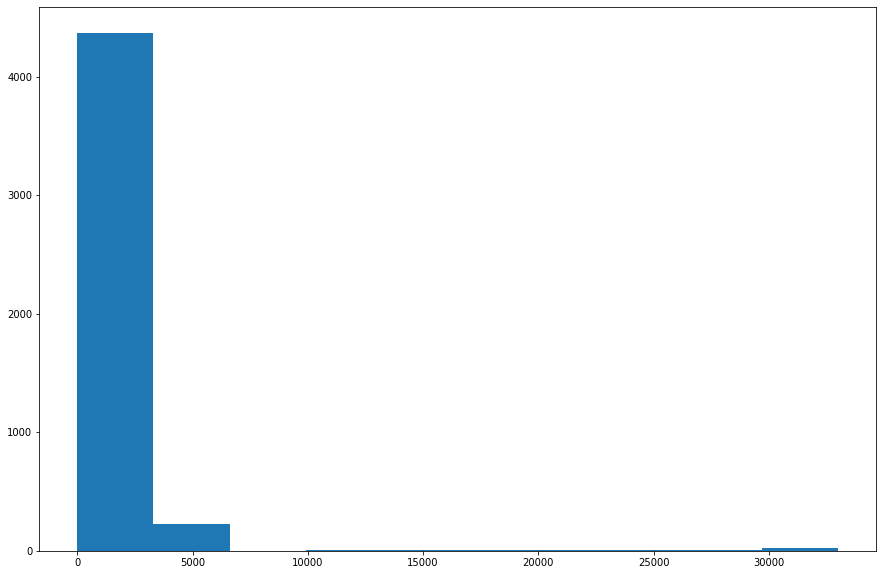

In [14]:
plt.figure(figsize=(15,10))
plt.hist(df_mean['Expected'].unique())
plt.show()

In [15]:
percentileofscore(df_mean['Expected'],df_mean['Expected'].mean())

91.7714203455707

In [16]:
df_mean.drop(df_mean[df_mean['Expected'] > df_mean['Expected'].mean()].index,inplace=True)

In [17]:
df_sample = df_mean.sample(10000)

In [18]:
df_sample.shape

(10000, 24)

In [19]:
features = [f for f in df_sample.columns]
features.remove('Expected')
features.remove('Id')


In [20]:
X = df_sample[features]
y = df_sample['Expected']

In [21]:
scaler = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(scaler.fit_transform(X),y,test_size=0.3,random_state=0)

**线性回归**

In [22]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [23]:
LR.score(x_test,y_test)

0.0005342700389370236

In [80]:
y_train_pred=LR.predict(x_train)
y_test_pred=LR.predict(x_test)

In [81]:
print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train,y_train_pred),
                                       mean_squared_error(y_test,y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train,y_train_pred),
                                            r2_score(y_test,y_test_pred)))

MSE Train: 126.954, Test: 131.844
R2_Score Train: 0.011, Test: 0.001


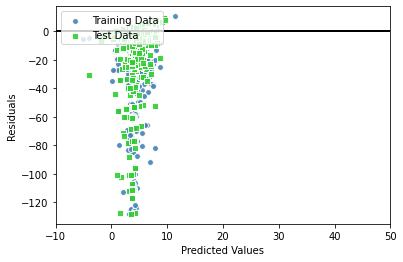

In [82]:
plt.scatter(y_train_pred,y_train_pred-y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([-10,50])
plt.savefig('./fig1.png')
plt.show()

**随机森林算法**

In [26]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
RFR.score(x_test,y_test)

-0.07541544088220142

In [53]:
y_train_pred=RFR.predict(x_train)
y_test_pred=RFR.predict(x_test)

In [54]:
print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train,y_train_pred),
                                       mean_squared_error(y_test,y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train,y_train_pred),
                                            r2_score(y_test,y_test_pred)))

MSE Train: 34.411, Test: 141.863
R2_Score Train: 0.732, Test: -0.075


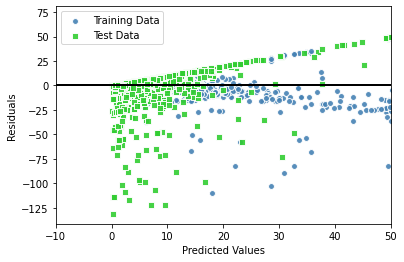

In [55]:
plt.scatter(y_train_pred,y_train_pred-y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([-10,50])
plt.savefig('./fig1.png')
plt.show()

**支持向量机SVM**

In [56]:
SVM = SVR()
SVM.fit(x_train,y_train)

SVR()

In [58]:
SVM.score(x_test,y_test)

-0.03898403670998074

In [57]:
y_train_pred=SVM.predict(x_train)
y_test_pred=SVM.predict(x_test)

In [59]:
print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train,y_train_pred),
                                       mean_squared_error(y_test,y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train,y_train_pred),
                                            r2_score(y_test,y_test_pred)))

MSE Train: 132.451, Test: 137.057
R2_Score Train: -0.031, Test: -0.039


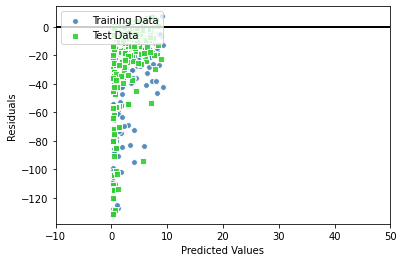

In [60]:
plt.scatter(y_train_pred,y_train_pred-y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([-10,50])
plt.savefig('./fig1.png')
plt.show()

**多层感知机MLP**

In [61]:
MLP = MLPRegressor(max_iter=1000)
MLP.fit(x_train,y_train)

MLPRegressor(max_iter=1000)

MLP是多层感知器（Multilayer Perceptron）的缩写，是一种前馈神经网络模型。它由多个神经元组成，每个神经元都与前一层的所有神经元相连。每个神经元都有一个权重和偏置，通过激活函数将输入信号转化为输出信号。

MLP可以用于分类和回归问题，常用的训练算法包括反向传播算法和随机梯度下降算法

In [62]:
MLP.score(x_test,y_test)

0.028961828283296853

In [65]:
y_train_pred=MLP.predict(x_train)
y_test_pred=MLP.predict(x_test)

In [66]:
print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train,y_train_pred),
                                       mean_squared_error(y_test,y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train,y_train_pred),
                                            r2_score(y_test,y_test_pred)))

MSE Train: 115.045, Test: 128.094
R2_Score Train: 0.104, Test: 0.029


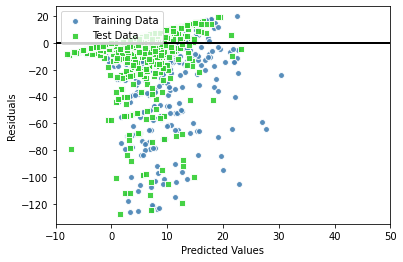

In [67]:
plt.scatter(y_train_pred,y_train_pred-y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([-10,50])
plt.savefig('./fig1.png')
plt.show()

**集成学习Adaboost**

In [68]:
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)

AdaBoostRegressor()

Adaboost是一种集成学习方法，它通过组合多个弱分类器来构建一个强分类器。它的核心思想是对那些被前一轮分类器错误分类的样本增加权重，从而使得下一轮分类器更加关注这些难以分类的样本。

Adaboost的训练过程可以简单概括为以下几个步骤：

初始化每个样本的权重为相等值。
训练一个弱分类器，并计算分类误差率。
根据分类误差率更新每个样本的权重，对于被错误分类的样本增加权重，对于被正确分类的样本减小权重。
根据更新后的权重训练下一个弱分类器，重复步骤2-3直到达到指定的迭代次数或分类误差率小于指定的阈值。
将所有弱分类器组合成一个强分类器

In [69]:
ABR.score(x_test,y_test)

-0.637093536352545

In [70]:
y_train_pred=ABR.predict(x_train)
y_test_pred=ABR.predict(x_test)

In [71]:
print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train,y_train_pred),
                                       mean_squared_error(y_test,y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train,y_train_pred),
                                            r2_score(y_test,y_test_pred)))

MSE Train: 213.745, Test: 215.957
R2_Score Train: -0.665, Test: -0.637


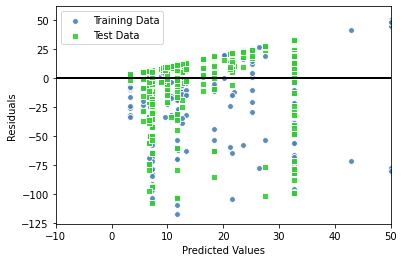

In [72]:
plt.scatter(y_train_pred,y_train_pred-y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([-10,50])
plt.savefig('./fig1.png')
plt.show()

**XGBOOST**

In [73]:
XGB = xgb.XGBRegressor()
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
XGB.score(x_test,y_test)

-0.042834605824153105

XGBoost (eXtreme Gradient Boosting) 是一种基于决策树的机器学习算法，用于分类和回归问题。它是由陈天奇在2014年开发的。XGBoost 是一个高效的实现，具有高度的可扩展性、准确性和灵活性

In [77]:
y_train_pred=XGB.predict(x_train)
y_test_pred=XGB.predict(x_test)

In [78]:
print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train,y_train_pred),
                                       mean_squared_error(y_test,y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train,y_train_pred),
                                            r2_score(y_test,y_test_pred)))

MSE Train: 45.355, Test: 137.565
R2_Score Train: 0.647, Test: -0.043


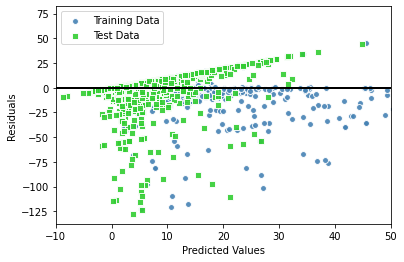

In [79]:
plt.scatter(y_train_pred,y_train_pred-y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([-10,50])
plt.savefig('./fig1.png')
plt.show()

In [ ]:
df_sub = pd.read_csv("../input/how-much-did-it-rain-ii/test.zip")

In [ ]:
df_sub_mean = process_data(df_sub)
df_sub_mean

In [ ]:
y_preds = SVM.predict(scaler.fit_transform(df_sub_mean[features]))
y_preds

In [ ]:
sub = pd.DataFrame(columns=['Id','Expected'])

In [ ]:
sub['Id'] = df_sub_mean['Id']
sub['Expected'] = y_preds
sub['Expected']

In [ ]:
sub.to_csv('submission.csv',index=False)